# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [ ]:
tips = sns.load('tips')

## Data
Seaborn comes with built-in data sets!

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


## distplot

The distplot shows the distribution of a univariate (one variable) set of observations.

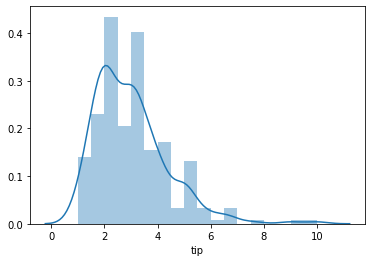

In [8]:
sns.distplot(tips['tip'])
#returns distribution and KDE(kernal density estimation line)

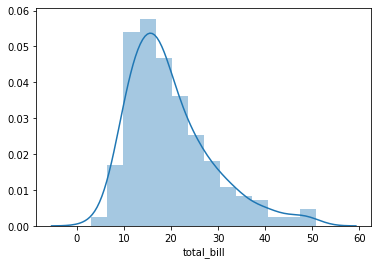

In [9]:
sns.distplot(tips['total_bill'])

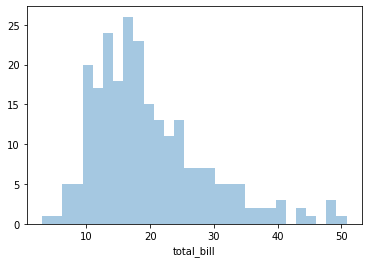

In [20]:
sns.distplot(tips['total_bill'], kde=False, bins=30) #remove KDE line
# change bin size for more definition

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

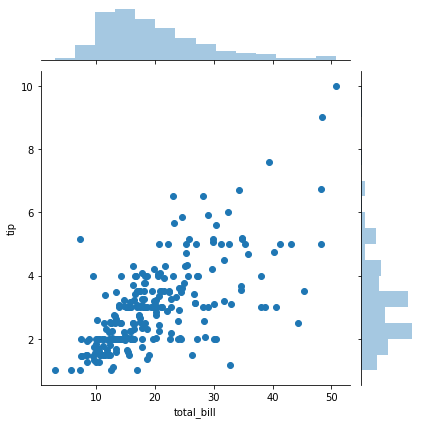

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips) # x and y are col names from dataframe
# scatter and distribution plots

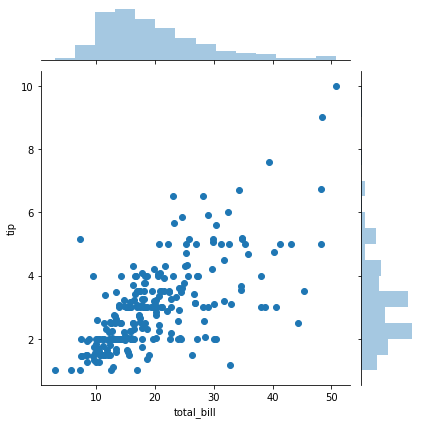

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='scatter') # kind = scatter is default

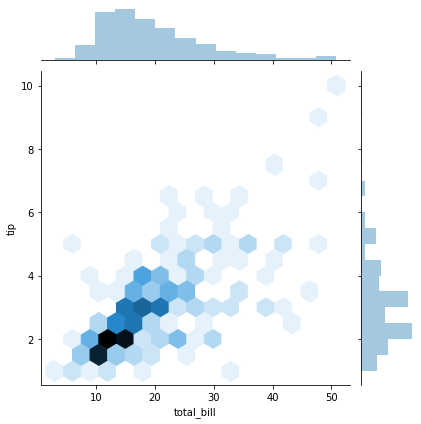

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex') # distribution with hexagons

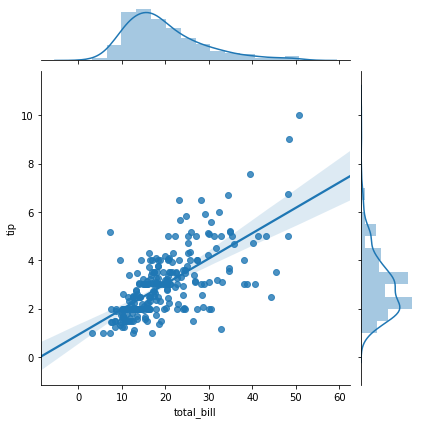

In [27]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg') # regression line ontop of scatter, has P-value & pearson coeff

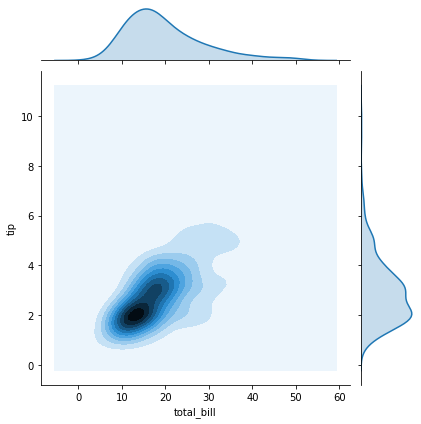

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde') # 2D kde (kernal density estimation)

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

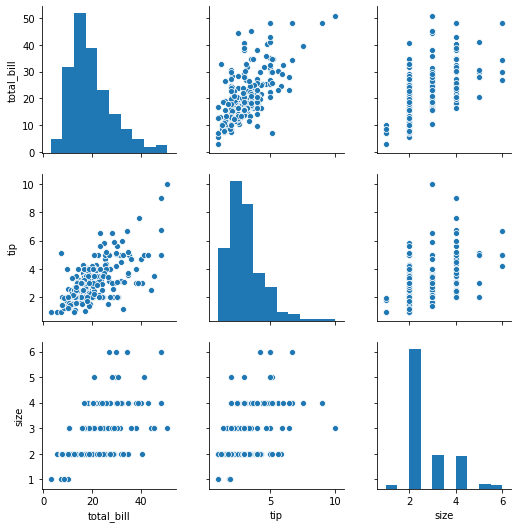

In [29]:
# does joinplot() for every combo of numerical cols in dataframe
sns.pairplot(tips)

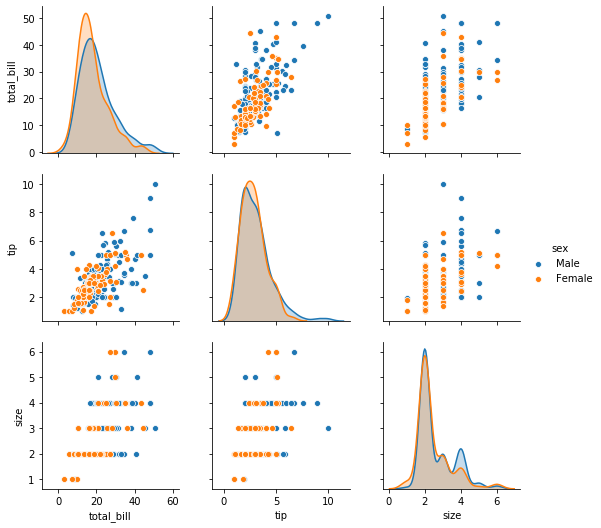

In [30]:
sns.pairplot(tips, hue='sex') # change Hue color using categorical column

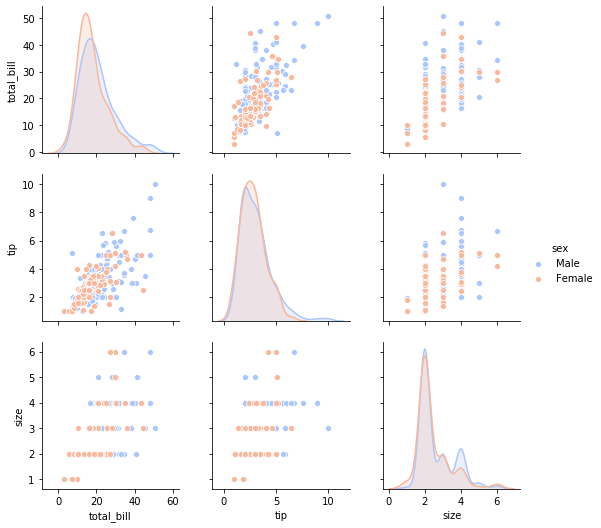

In [32]:
sns.pairplot(tips, hue='sex', palette='coolwarm') #

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

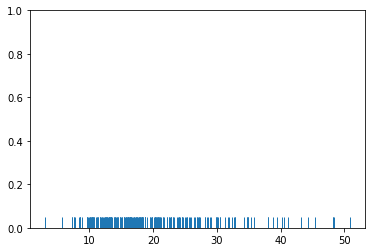

In [33]:
sns.rugplot(tips['total_bill']) # historgram as bins, rugplot shows concentration

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

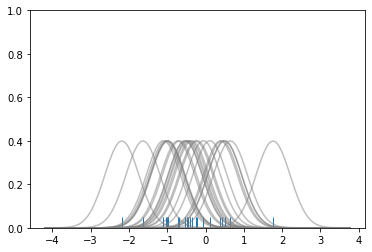

In [34]:
# Don't worry about understanding this code!
# It's just to show the diagram below for KDE explanation purposes 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # haven't used this library yet

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

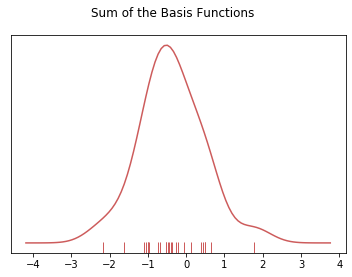

In [35]:
# KDE is the sum of all the normal distrubtions in plot above

# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

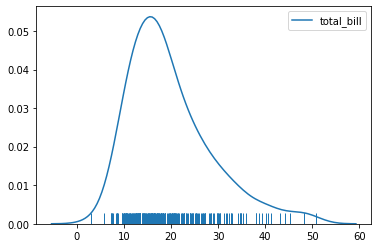

In [36]:
sns.kdeplot(tips['total_bill']) # standalone KDE
sns.rugplot(tips['total_bill']) # overlay rugplot

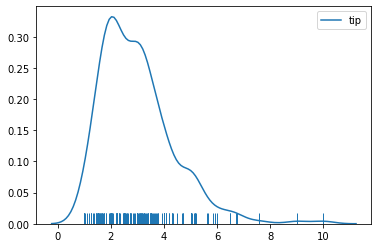

In [37]:
sns.kdeplot(tips['tip']) # standalone KDE
sns.rugplot(tips['tip']) # overlay rugplot